In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

LISTINGS_PATH = r"C:/Users/Labid/Desktop/ML/listings.csv"

def _find_listings_csv():
    candidates = []
    if LISTINGS_PATH:
        candidates.append(Path(LISTINGS_PATH))
    # common locations relative to notebook / current working dir
    candidates += [
        Path("listings.csv"),
        Path("./data/listings.csv"),
        Path("../data/listings.csv"),
    ]
    for p in candidates:
        if p.exists():
            return p.resolve()
    # fallback: search a few levels deep (kept small to avoid long runs)
    for root in [Path("."), Path("..")]:
        try:
            for p in root.rglob("listings.csv"):
                return p.resolve()
        except Exception:
            pass
    return None

csv_path = _find_listings_csv()

if csv_path is not None:
    print(f"Loading dataset from: {csv_path}")
    df = pd.read_csv(csv_path)
else:
    # Fallback: generate a small synthetic dataset so the notebook runs end-to-end
    # (Replace by providing a real listings.csv as described above.)
    print("WARNING: listings.csv not found. Using synthetic sample data so the notebook can run.")
    rng = np.random.default_rng(42)
    n = 2000
    df = pd.DataFrame({
        "price": rng.normal(110, 45, n).clip(25, 400),
        "room_type": rng.choice(["Entire home/apt", "Private room", "Shared room"], size=n, p=[0.6, 0.35, 0.05]),
        "accommodates": rng.integers(1, 6, n),
        "bedrooms": rng.choice([0,1,2,3], size=n, p=[0.1,0.55,0.28,0.07]),
        "bathrooms": rng.choice([1,1.5,2,2.5], size=n, p=[0.55,0.15,0.25,0.05]),
        "latitude": 44.49 + rng.normal(0, 0.03, n),
        "longitude": 11.34 + rng.normal(0, 0.04, n),
        "neighbourhood_cleansed": rng.choice(
            ["Centro Storico", "San Donato-San Vitale", "Bolognina", "Saragozza", "Porto-Saragozza"],
            size=n
        ),
    })

# --- Basic cleaning: ensure price is numeric ---
if "price" in df.columns:
    if df["price"].dtype == object:
        # Typical Airbnb format: "$123.00" or "€123.00"
        df["price"] = (
            df["price"]
            .astype(str)
            .str.replace(r"[\$,€]", "", regex=True)
            .str.replace(",", "", regex=False)
            .str.strip()
        )
        df["price"] = pd.to_numeric(df["price"], errors="coerce")

df.shape
df.head()
df.info()

Loading dataset from: C:\Users\Labid\Desktop\ML\listings.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4642 non-null   int64  
 1   listing_url                                   4642 non-null   object 
 2   scrape_id                                     4642 non-null   int64  
 3   last_scraped                                  4642 non-null   object 
 4   source                                        4642 non-null   object 
 5   name                                          4642 non-null   object 
 6   description                                   4553 non-null   object 
 7   neighborhood_overview                         2437 non-null   object 
 8   picture_url                                   4642 non-null   object 
 9   ho

In [2]:
df["price"].head(10)

0     68.0
1     50.0
2     92.0
3    133.0
4    143.0
5     71.0
6      NaN
7    184.0
8    162.0
9    122.0
Name: price, dtype: float64

In [3]:
df["price"].isna().sum()

np.int64(531)

In [4]:
df[df["price"].isna()].head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6,374610,https://www.airbnb.com/rooms/374610,20250922034016,2025-10-08,previous scrape,Monolocale con WIFI cucina-bagno!,Apartamento Maggiore is a lovely open space st...,"City center, supermarket nearby, bars, shops a...",https://a0.muscache.com/pictures/hosting/Hosti...,1884566,...,4.81,4.81,4.36,IT037006C2PTCUBVDK,t,4,4,0,0,0.75
41,1222983,https://www.airbnb.com/rooms/1222983,20250922034016,2025-10-08,previous scrape,In the heart and soul bologna,NaN,NaN,https://a0.muscache.com/pictures/18403070/4075...,6670383,...,4.80,4.20,4.00,IT037006B4Q42KZ5FW,f,3,0,3,0,0.04
42,1250727,https://www.airbnb.com/rooms/1250727,20250922034016,2025-10-08,previous scrape,In the heart and soul of Bologna,NaN,NaN,https://a0.muscache.com/pictures/18845076/6c14...,6670383,...,4.84,4.63,4.05,IT037006B4Q42KZ5FW,f,3,0,3,0,0.13
43,1250790,https://www.airbnb.com/rooms/1250790,20250922034016,2025-10-08,previous scrape,In the heart and soul of Bologna,NaN,NaN,https://a0.muscache.com/pictures/18845627/9e48...,6670383,...,4.90,4.60,4.80,NaN,f,3,0,3,0,0.07
61,2219937,https://www.airbnb.com/rooms/2219937,20250922034016,2025-10-08,previous scrape,Camera tranquilla-luminosa zona Ospedale Maggiore,In the apartment where I live I offer a spacio...,NaN,https://a0.muscache.com/pictures/98f03a5a-1a5b...,11325267,...,4.83,4.50,4.66,NaN,f,1,0,1,0,1.48


In [5]:
df = df.dropna(subset=["price"])


In [6]:
df.shape

(4111, 79)

In [7]:
df["price"].isna().sum()

np.int64(0)

In [8]:
df["price"].dtype

dtype('float64')

In [9]:
### Filtring to only Full Apartements ( And Not Single Rooms ) 

In [10]:
df["room_type"].value_counts()

room_type
Entire home/apt    3269
Private room        822
Shared room          14
Hotel room            6
Name: count, dtype: int64

In [11]:
df = df[df["room_type"] == "Entire home/apt"]

In [12]:
df["room_type"].value_counts()


room_type
Entire home/apt    3269
Name: count, dtype: int64

In [13]:
df["price"].describe()

count     3269.000000
mean       212.925359
std        427.160815
min         30.000000
25%        111.000000
50%        156.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64

In [14]:
df["rent_proxy"] = df["price"] * 30 #Goal is monthly rent and not daily , It is only a PROXY  ≠ long-term rent 

In [15]:
core_features = [
    "rent_proxy",
    "accommodates",
    "bedrooms",
    "bathrooms",
    "latitude",
    "longitude",
    "neighbourhood_cleansed"
]
df_model = df[core_features].copy()


In [16]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,rent_proxy
2,85368,https://www.airbnb.com/rooms/85368,20250922034016,2025-09-22,city scrape,Garden House Bologna,NaN,NaN,https://a0.muscache.com/pictures/585815/331d45...,467675,...,4.81,4.83,IT037006C2QKQSH3S7,f,1,1,0,0,0.39,2760.0
3,219878,https://www.airbnb.com/rooms/219878,20250922034016,2025-09-22,city scrape,Top floor with elevator for Long and Short Stays,"Bright, quiet apartment with a private office ...","has many shops, cafes, wine bars, restaurants ...",https://a0.muscache.com/pictures/f16e5b7e-68b3...,1139326,...,4.84,4.78,IT037006C2HQERHOGR,f,1,1,0,0,1.09,3990.0
4,229114,https://www.airbnb.com/rooms/229114,20250922034016,2025-09-22,city scrape,Terrace between fair&city center,"The apartment is in a strategic location, you ...",Close to the apartment you can find:<br />- ex...,https://a0.muscache.com/pictures/hosting/Hosti...,1196205,...,4.53,4.75,IT037006C2KRRTWGRT,t,1,1,0,0,0.63,4290.0
5,266777,https://www.airbnb.com/rooms/266777,20250922034016,2025-09-22,city scrape,BOLOGNA CENTRE APARTMENT W/ GARDEN,Pratello Garden is a tourist apartment with al...,"Il quartiere del centro del ""Pratello"" è un qu...",https://a0.muscache.com/pictures/39f0f2ce-2e19...,1398894,...,4.80,4.67,NaN,f,1,1,0,0,0.31,2130.0
7,383256,https://www.airbnb.com/rooms/383256,20250922034016,2025-09-22,city scrape,Appartamento Open Space in centro!,"A beautiful open space apartment on 2 floors, ...","Central area, bars restaurants shops all withi...",https://a0.muscache.com/pictures/miso/Hosting-...,1884566,...,4.86,4.56,IT037006C2UYW8RN2A,t,4,4,0,0,1.45,5520.0


In [17]:
df_model.isna().sum()

rent_proxy                0
accommodates              0
bedrooms                  1
bathrooms                 0
latitude                  0
longitude                 0
neighbourhood_cleansed    0
dtype: int64

In [18]:
df_model = df_model.dropna(
    subset=["bedrooms", "bathrooms", "latitude", "longitude"]
)


In [19]:
df_model.isna().sum()


rent_proxy                0
accommodates              0
bedrooms                  0
bathrooms                 0
latitude                  0
longitude                 0
neighbourhood_cleansed    0
dtype: int64

In [20]:
df["rent_proxy"].describe()

count      3269.000000
mean       6387.760783
std       12814.824463
min         900.000000
25%        3330.000000
50%        4680.000000
75%        6600.000000
max      300000.000000
Name: rent_proxy, dtype: float64

<Axes: >

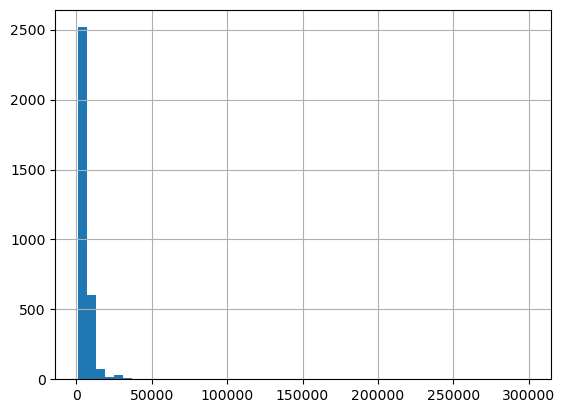

In [21]:
df["rent_proxy"].hist(bins=50) 

<Axes: xlabel='bedrooms', ylabel='rent_proxy'>

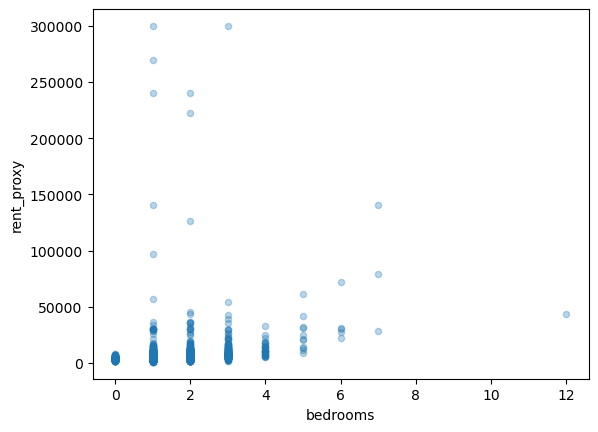

In [22]:
df.plot.scatter(x="bedrooms", y="rent_proxy", alpha=0.3)

<Axes: title={'center': 'rent_proxy'}, xlabel='neighbourhood_cleansed'>

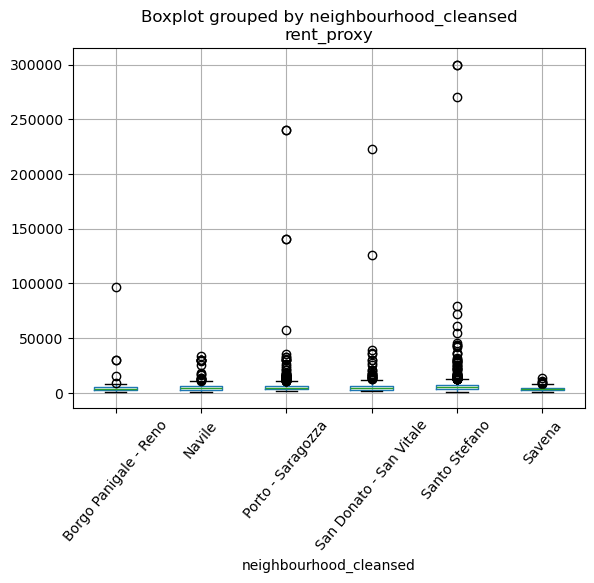

In [23]:
df.boxplot(column="rent_proxy", by="neighbourhood_cleansed", rot=50)

In [24]:
df[["rent_proxy", "accommodates", "bedrooms", "bathrooms"]].corr()

,rent_proxy,accommodates,bedrooms,bathrooms
rent_proxy,1.000000,0.208627,0.211866,0.216381
accommodates,0.208627,1.000000,0.738639,0.575070
bedrooms,0.211866,0.738639,1.000000,0.660924
bathrooms,0.216381,0.575070,0.660924,1.000000


In [25]:
features = [
    "rent_proxy",
    "accommodates",
    "bedrooms",
    "bathrooms",
    "latitude",
    "longitude",
    "neighbourhood_cleansed"
]

In [26]:
df_loc = df[features].copy()

In [27]:
df_loc = df_loc.dropna(
    subset=["bedrooms", "bathrooms", "latitude", "longitude", "neighbourhood_cleansed"]
)

In [28]:
df_loc["neighbourhood_cleansed"].value_counts().head(10)

neighbourhood_cleansed
Santo Stefano              1245
Porto - Saragozza          1082
Navile                      347
San Donato - San Vitale     319
Borgo Panigale - Reno       173
Savena                      102
Name: count, dtype: int64

In [29]:
df_loc_encoded = pd.get_dummies(
    df_loc,
    columns=["neighbourhood_cleansed"],
    drop_first=True
)

In [30]:
df_loc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3268 entries, 2 to 4641
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   rent_proxy                                      3268 non-null   float64
 1   accommodates                                    3268 non-null   int64  
 2   bedrooms                                        3268 non-null   float64
 3   bathrooms                                       3268 non-null   float64
 4   latitude                                        3268 non-null   float64
 5   longitude                                       3268 non-null   float64
 6   neighbourhood_cleansed_Navile                   3268 non-null   bool   
 7   neighbourhood_cleansed_Porto - Saragozza        3268 non-null   bool   
 8   neighbourhood_cleansed_San Donato - San Vitale  3268 non-null   bool   
 9   neighbourhood_cleansed_Santo Stefano          

In [31]:
df_loc_encoded[["latitude", "longitude"]].describe()

,latitude,longitude
count,3268.000000,3268.000000
mean,44.497397,11.343570
std,0.010095,0.019683
min,44.423110,11.237330
25%,44.492134,11.337222
50%,44.496750,11.344701
75%,44.501675,11.352223
max,44.550930,11.419208


In [32]:
X = df_loc_encoded.drop(columns=["rent_proxy"])
y = df_loc_encoded["rent_proxy"]  

In [33]:
X.shape, y.shape

((3268, 10), (3268,))

In [34]:
#Train / Test Phase : 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

r2

0.042567311020518694

In [37]:
df_loc_encoded["log_rent"] = np.log(df_loc_encoded["rent_proxy"])

In [38]:
y = np.log(df_loc_encoded["rent_proxy"])
X = df_loc_encoded.drop(columns=["rent_proxy", "log_rent"])

In [39]:
upper = df_loc_encoded["rent_proxy"].quantile(0.99)
df_loc_encoded = df_loc_encoded[df_loc_encoded["rent_proxy"] <= upper]

In [40]:
df_loc_encoded["log_rent"] = np.log(df_loc_encoded["rent_proxy"])

In [41]:
LinearRegression()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)

In [43]:
# NOTE: Manual scaling removed.
# Scaling must happen inside a Pipeline/ColumnTransformer to avoid data leakage and SettingWithCopyWarning.
# (No code needed here.)


In [44]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred_log = np.clip(y_pred_log, None, 10)
y_pred = np.exp(y_pred_log)

In [45]:
upper = df["rent_proxy"].quantile(0.99)

In [46]:
df = df.loc[df["rent_proxy"] <= upper].copy()

In [47]:
df.loc[:, "log_rent"] = np.log(df["rent_proxy"])

In [48]:
assert "log_rent" in df.columns
assert np.isfinite(df["log_rent"]).all()

In [49]:
features = [
    "accommodates",
    "bedrooms",
    "bathrooms",
    "latitude",
    "longitude",
    "neighbourhood_cleansed"
]

df_model = df[features + ["log_rent"]].dropna()

X = df_model.drop(columns="log_rent")
y = df_model["log_rent"]

X = pd.get_dummies(X, drop_first=True)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
baseline_pred = np.full_like(y_test, y_train.mean())

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

num_cols = ["accommodates", "bedrooms", "bathrooms", "latitude", "longitude"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge(alpha=1.0))
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [53]:
y_pred_log = pipeline.predict(X_test)


y_pred_log = np.clip(y_pred_log, None, 10)

y_pred = np.exp(y_pred_log)
y_true = np.exp(y_test)

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_log)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

baseline_r2 = r2_score(y_test, baseline_pred)

print("Baseline R²:", baseline_r2)
print("Model R²:", r2)
print("MAE (€):", mae)
print("RMSE (€):", rmse)

Baseline R²: -0.00041785253294390756
Model R²: 0.3071544439603292
MAE (€): 1923.4060080610755
RMSE (€): 3117.9765676607467


In [55]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=5,
    scoring="r2"
)

print("CV R² mean:", cv_scores.mean())
print("CV R² std:", cv_scores.std())


CV R² mean: 0.2519015628406082
CV R² std: 0.05884873015840129


In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred_log = rf.predict(X_test)
rf_pred_log = np.clip(rf_pred_log, None, 10)

rf_pred = np.exp(rf_pred_log)

In [57]:
rf_mae = mean_absolute_error(y_true, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_true, rf_pred))
rf_r2 = r2_score(y_test, rf_pred_log)

print("RF R²:", rf_r2)
print("RF MAE (€):", rf_mae)
print("RF RMSE (€):", rf_rmse)

RF R²: 0.31901563471466987
RF MAE (€): 1884.5418312627698
RF RMSE (€): 3112.280643005948


In [58]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)

longitude                                         0.350276
latitude                                          0.312151
bathrooms                                         0.137592
accommodates                                      0.093287
bedrooms                                          0.084828
neighbourhood_cleansed_Santo Stefano              0.007155
neighbourhood_cleansed_Porto - Saragozza          0.005562
neighbourhood_cleansed_San Donato - San Vitale    0.004324
neighbourhood_cleansed_Navile                     0.002685
neighbourhood_cleansed_Savena                     0.002141
dtype: float64

## Interface-ready model packaging (save a single reusable model)

The goal of this section is to **freeze** preprocessing + model into a single `Pipeline` and save it to disk so that any interface (Streamlit / FastAPI / React) can call the predictor reliably.

This avoids the common production issue where `get_dummies()` columns do not match between training and inference.


In [59]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# -----------------------
# Interface-ready training (single source of truth)
# -----------------------

# 1) Choose features
FEATURES_NUM = ["accommodates", "bedrooms", "bathrooms", "latitude", "longitude"]
FEATURES_CAT = ["neighbourhood_cleansed"]  # if your dataset uses a different column name, change it here

# 2) Build training frame (self-contained; does not rely on earlier X/y cells)
required_cols = FEATURES_NUM + FEATURES_CAT + ["rent_proxy"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise KeyError(f"Missing required columns in df: {missing}. "
                   f"Check your dataset columns and/or your feature engineering cells.")

df_model = df[required_cols].dropna().copy()

# Optional but recommended: trim luxury outliers to stabilize training
upper = df_model["rent_proxy"].quantile(0.99)
df_model = df_model.loc[df_model["rent_proxy"] <= upper].copy()

# Log-transform target
df_model["log_rent"] = np.log(df_model["rent_proxy"])

X_raw = df_model[FEATURES_NUM + FEATURES_CAT]
y_log = df_model["log_rent"]

X_train_raw, X_test_raw, y_train_log, y_test_log = train_test_split(
    X_raw, y_log, test_size=0.2, random_state=42
)

# 3) Preprocess + model (robust to unseen neighbourhoods)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), FEATURES_NUM),
        ("cat", OneHotEncoder(handle_unknown="ignore"), FEATURES_CAT),
    ],
    remainder="drop"
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", Ridge(alpha=1.0)),
])

pipe.fit(X_train_raw, y_train_log)

# 4) Evaluate (log-space + euro-space)
y_pred_log = pipe.predict(X_test_raw)

# Safety clip before exp() to avoid overflow and unrealistic results
y_pred_log = np.clip(y_pred_log, None, 10)

y_pred_eur = np.exp(y_pred_log)
y_true_eur = np.exp(y_test_log)

print("Interface-ready model metrics")
print("R² (log-space):", r2_score(y_test_log, y_pred_log))
print("MAE (€):", mean_absolute_error(y_true_eur, y_pred_eur))
print("RMSE (€):", np.sqrt(mean_squared_error(y_true_eur, y_pred_eur)))

# 5) Save bundle for the Streamlit app
bundle = {
    "pipeline": pipe,
    "features_num": FEATURES_NUM,
    "features_cat": FEATURES_CAT,
    "target": "rent_proxy",
    "clip_max_log": 10,
    "notes": "Predicts monthly rent proxy. Model trained on log(rent_proxy). Output is exp(pred_log) in EUR/month."
}

joblib.dump(bundle, "rent_model.joblib")
print("Saved model bundle: rent_model.joblib")


Interface-ready model metrics
R² (log-space): 0.1923730102715997
MAE (€): 1807.9525546952627
RMSE (€): 2592.5315205883276
Saved model bundle: rent_model.joblib


## Create a simple interface (Streamlit)

The next cell writes an `app.py` you can run locally:

```bash
pip install -r requirements.txt
streamlit run app.py
```

The app loads `rent_model.joblib` and predicts a monthly price from user inputs.


In [60]:
# Write Streamlit app + requirements to the working directory (interface files)
import textwrap
from pathlib import Path

app_py = r'''
import numpy as np
import pandas as pd
import joblib
import streamlit as st
from pathlib import Path

# Load model bundle next to this script (robust if launched from another folder)
MODEL_PATH = Path(__file__).with_name("rent_model.joblib")
bundle = joblib.load(MODEL_PATH)

pipe = bundle["pipeline"]
FEATURES_NUM = bundle["features_num"]
FEATURES_CAT = bundle["features_cat"]
CLIP_MAX_LOG = bundle.get("clip_max_log", 10)

st.set_page_config(page_title="Rent Price Predictor", layout="centered")
st.title("Rent Price Prediction")
st.caption("Predicts monthly rent (proxy) based on listing features. Model trained in log-space.")

with st.form("rent_form"):
    col1, col2 = st.columns(2)

    with col1:
        accommodates = st.number_input("Accommodates", min_value=1, max_value=20, value=2)
        bedrooms = st.number_input("Bedrooms", min_value=0, max_value=10, value=1)
        bathrooms = st.number_input("Bathrooms", min_value=0.0, max_value=10.0, value=1.0, step=0.5)

    with col2:
        latitude = st.number_input("Latitude", value=44.4949, format="%.6f")
        longitude = st.number_input("Longitude", value=11.3426, format="%.6f")
        neighbourhood = st.text_input("Neighbourhood (exact label from dataset)", value="")

    submitted = st.form_submit_button("Predict")

if submitted:
    row = {
        "accommodates": accommodates,
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "latitude": latitude,
        "longitude": longitude,
        FEATURES_CAT[0]: neighbourhood
    }
    X_input = pd.DataFrame([row])

    pred_log = float(pipe.predict(X_input)[0])
    pred_log = min(pred_log, CLIP_MAX_LOG)

    pred_eur = float(np.exp(pred_log))

    st.subheader("Estimated monthly rent")
    st.metric("Prediction (€ / month)", f"{pred_eur:,.0f}")

    st.caption("If the neighbourhood is unknown, the model ignores it (OneHotEncoder(handle_unknown='ignore')).")
'''

req_txt = r'''
numpy
pandas
scikit-learn
scipy
joblib
streamlit
'''

Path("app.py").write_text(textwrap.dedent(app_py).lstrip(), encoding="utf-8")
Path("requirements.txt").write_text(textwrap.dedent(req_txt).lstrip(), encoding="utf-8")

print("Wrote: app.py")
print("Wrote: requirements.txt")


Wrote: app.py
Wrote: requirements.txt


## Run the interface

In a terminal, from the folder containing `app.py` and `rent_model.joblib`:

```bash
pip install -r requirements.txt
streamlit run app.py
```

If you are using Anaconda, ensure you run this inside the same environment where you installed the requirements.
